In [ ]:
# After finishing the assignment, I have a wild guess, is the product Bitcoin? ;)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
t=pd.read_csv('Test Attachment.csv')

In [3]:
# Overally the trade has a loss of 195 ticks based on below
# The overall loss will be investigated and analysed
t['ticksRealized'].sum()

-195

In [4]:
# Tick size is 0.25 based on below calculation
t['tickSize']= (t['exitPrice']-t['entryPrice'])/t['ticksRealized']

In [5]:
# By observation the ticksRealized/entrySigma ratio is relatively constant, name it as exitTrigger
t['exitTrigger']=t['ticksRealized']/t['entrySigma']

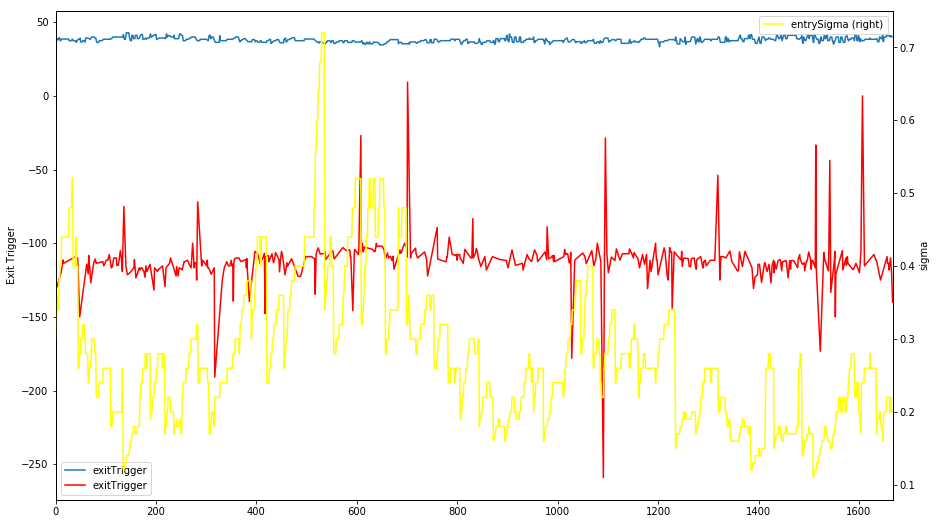

In [6]:
# I plotted exitTrigger seperately for normal trades(blue) and forced trades (red) on the same time axis, along with vol curve (yellow)
fig, ax1 = plt.subplots()
fig.set_size_inches(15, 9)
ax3 = ax1.twinx()
exit = t[t['exitReason'] == 'exit'][['entryDT', 'exitReason', 'exitTrigger']].plot(ax=ax1, label='exit').set_ylabel('Exit Trigger')
sigma = t[['entryDT', 'exitReason', 'entrySigma']].plot(ax=ax3, secondary_y=True, color='yellow').set_ylabel('sigma')
force = t[t['exitReason'] == 'force'][['entryDT', 'exitReason', 'exitTrigger']].plot(ax=ax1, color='red')

# The finding is that normal trades shows a consistent ratio throughout the trade and make stable profit, 
#but there are quite a few outliers in the forced trades, 
#there isn't any specific patterns shown with the vol curve
#from the graph the forced trades ratio when consistent falls around -120, let's investigate the outliers further

In [7]:
# Subset forced trades
t_force = t.loc[(t.exitReason =='force')]

In [8]:
# Sorting by exitTrigger to see the top ranked outlier trades
t_force_a= t_force.sort_values(by=['exitTrigger'])
t_force_a.head(20)

# The finding is that from the top trades, they tend to have a very low/almost zero entryProb

,entryDT,entrySide,entryPrice,entryTick,entryProb,entrySigma,exitDT,exitSide,exitPrice,exitReason,durationInSecs,ticksRealized,ticksFromOpen,tickSize,exitTrigger
1091,50:39.7,B,6708.25,55,0.00000,0.22,52:00.9,S,6694.00,force,81.23,-57,184,0.25,-259.090909
317,00:52.9,B,6937.75,43,0.00000,0.22,01:04.8,S,6927.25,force,11.88,-42,197,0.25,-190.909091
1028,01:11.1,B,6594.00,58,0.00000,0.32,05:25.1,S,6579.75,force,253.98,-57,441,0.25,-178.125000
1523,14:15.3,B,6918.25,27,0.00000,0.15,17:34.0,S,6911.75,force,198.72,-26,81,0.25,-173.333333
1553,08:55.3,S,6882.25,27,0.00001,0.18,13:13.9,B,6889.00,force,258.55,-27,168,-0.25,-150.000000
48,49:18.6,B,6774.75,42,0.00001,0.28,51:07.0,S,6764.25,force,108.47,-42,73,0.25,-150.000000
417,31:42.1,S,6558.50,65,0.00000,0.44,32:37.7,B,6574.75,force,55.60,-65,438,-0.25,-147.727273
592,37:55.4,B,6397.00,70,0.00000,0.48,40:31.4,S,6379.50,force,156.00,-70,568,0.25,-145.833333
1228,36:19.2,S,6658.75,36,0.00093,0.34,37:22.6,B,6671.00,force,63.42,-49,198,-0.25,-144.117647
1667,50:00.1,B,6975.50,26,0.00009,0.20,50:06.5,S,6968.50,force,6.40,-28,86,0.25,-140.000000


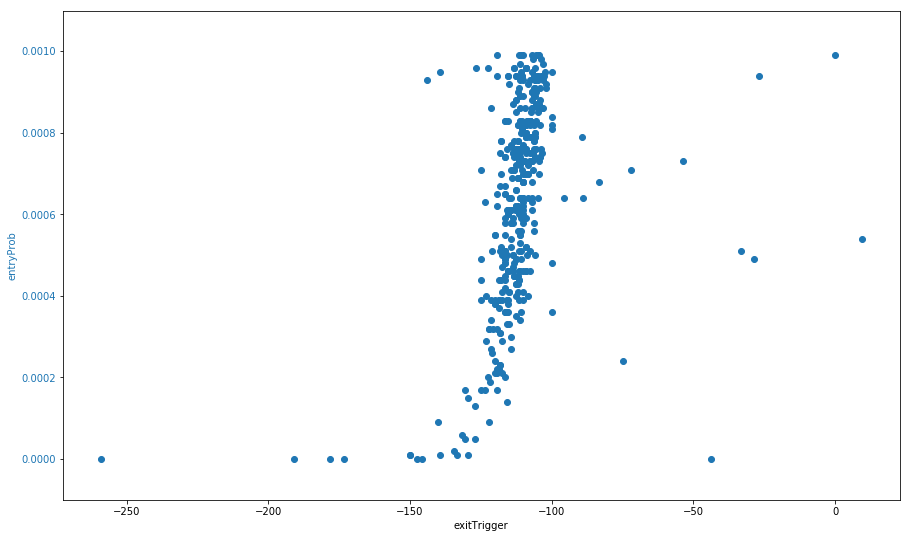

In [9]:
# So I scatter plot the correlation of exitTrigger and entryProb
fig, ax1 = plt.subplots()
fig.set_size_inches(15, 9)
color = 'tab:blue'
ax1.set_xlabel('exitTrigger')
ax1.set_ylim([-0.0001,0.0011])
ax1.set_ylabel('entryProb', color=color)
ax1.scatter(t_force['exitTrigger'],t_force['entryProb'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# From the scatterplot, the most largest outliers are having entryProb = 0,
# there is a trend that when entryProb tends to be very close to (or actually) zero,
# a forced trade could deviate to the downside (more loss) from its potentially targeted exit ratio 
# of realized ticks and entry sigma.
# If the algorithm could be programmed to avoid this trend, trade result could potentially be optimized.
# Meanwhile the upside outliers scatter in all entry probs and don't show a particular pattern.
# There is one specific forced trade which yield positive realized ticks.

# I pressume entryProb stands for the probability of capturing the desired trade, 
# it leads to a conclusion that the algorithm performs weakly to shoot for forced trade when entryProb is very low,
# but from other trades, it doesn't seem to be an issue.

In [10]:
# if we in the hindsight 'avoided' the top 10 outliers
t_force_a['ticksRealized'][:10].sum()

# The trade result could be improved to a positive 268 ticks realized (-195+463)
# *Certainly, to improve the PnL is more complex than this maths

-463

In [11]:
# A common strategy of trading is moving average crossover, based of the information provided I tried
# to calculated moving average per 100 trades and plot entryPrice and vol curve together below

In [12]:
# Calculating moving average every 100 trades
def avg(df, start):
    return sum(df['entryPrice'][start-100:start]) / len(df[start-100:start]) if len(df[start-100:start]) > 0 else None

In [13]:
# Add moving avg as a column
t['movingAvg'] = [avg(t, i) for i in range(len(t))]

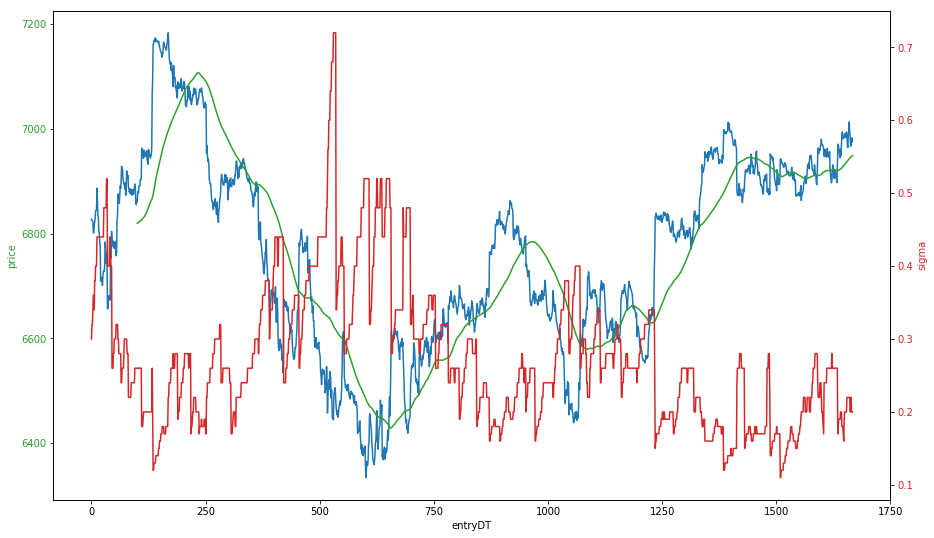

In [14]:
# Plot entryPrice (blue), movingAvg (green) and vol curve (red)
fig, ax1 = plt.subplots()
fig.set_size_inches(15, 9)
color = 'tab:blue'
ax1.set_xlabel('entryDT')
ax1.set_ylabel('price', color=color)
ax1.plot(t['entryPrice'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:green'
ax1.set_xlabel('entryDT')
ax1.set_ylabel('price', color=color)
ax1.plot(t['movingAvg'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('sigma', color=color)  
ax2.plot(t['entrySigma'], color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.show()

# I don't see significant correlation between 

In [15]:
# Plot buy/sell signal
def f(row):
    if row['entrySide'] == 'B':
        val = 1
    else:
        val = -1
    return val

t['signal']=t.apply(f,axis=1)

In [16]:
# Calculating buy/sell bias every 100 trades
def bias(df, start):
    return sum(df['signal'][start-100:start]) / len(df[start-100:start]) if len(df[start-100:start]) > 0 else None

In [17]:
# Add buy/sell bias as a column
t['b/s bias'] = [bias(t, i) for i in range(len(t))]

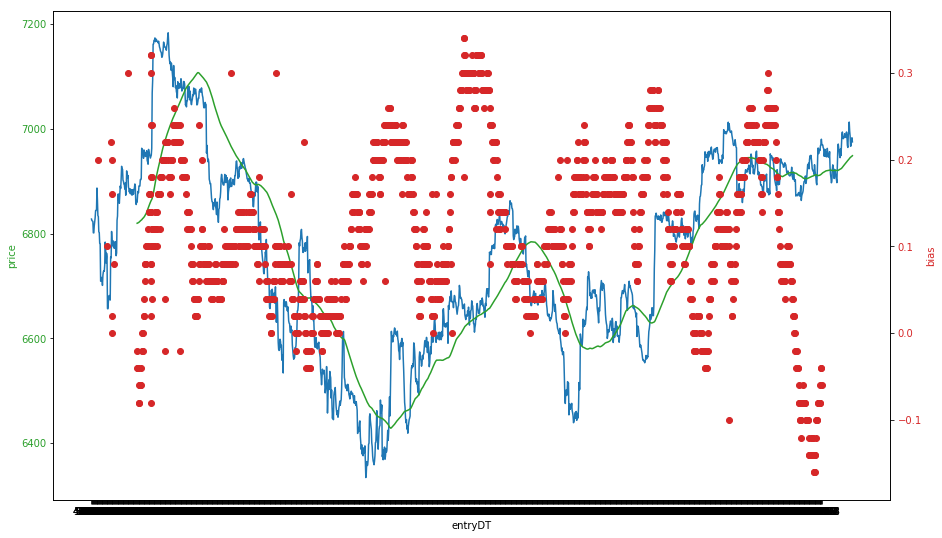

In [18]:
# Plot entryPrice (blue), movingAvg (green) and vol curve (red)
fig, ax1 = plt.subplots()
fig.set_size_inches(15, 9)
color = 'tab:blue'
ax1.set_xlabel('entryDT')
ax1.set_ylabel('price', color=color)
ax1.plot(t['entryPrice'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:green'
ax1.set_xlabel('entryDT')
ax1.set_ylabel('price', color=color)
ax1.plot(t['movingAvg'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('bias', color=color)  
ax2.scatter(t['entryDT'],t['b/s bias'], color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.show()

# Let's assume strategy is enter with a moving average crossover: buy when spot price below moving average,
# sell when spot price above moving average.
# and exit when price reaches the point to realize the ticksrealized/entrysigma ratio.

# with this hypothesis, bias >0 should occur when blue line below green line and vice versa.
# We can see overally, long bias signal is dominating even at some times spot price is way above moving average.
# The sell signals are with minority but most of time go along with the hypothesis.
# Since the moving average is not by fact the actual moving average of the product, and data given is very limited,
# (it is by trades recorded, not actual over time moving averages),
# the pattern will have some deviation from the reality.

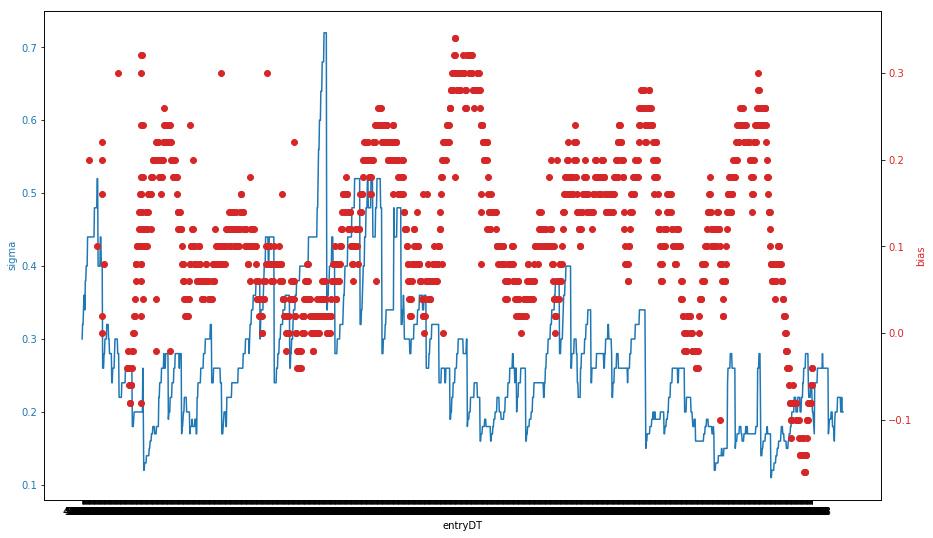

In [19]:
# I also notice the pattern of buy/sell and vol
# Plot the two below

fig, ax1 = plt.subplots()
fig.set_size_inches(15, 9)
color = 'tab:blue'
ax1.set_xlabel('entryDT')
ax1.set_ylabel('sigma', color=color)
ax1.plot(t['entrySigma'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('bias', color=color)  
ax2.scatter(t['entryDT'],t['b/s bias'], color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.show()

# The pattern does show that there are buy signal when vol goes/remains low and sell signals when vol plumps up.
# So my second hypothesis is the algorithm trades volatility of the product.